In [154]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

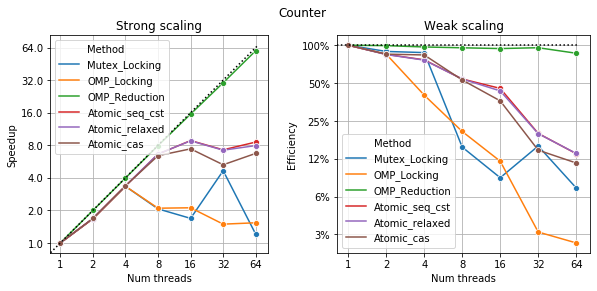

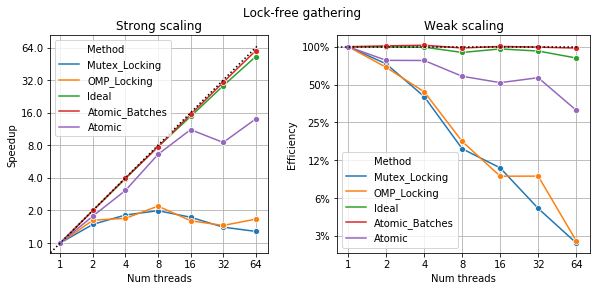

In [177]:
file_prefixes = ["atomic_increment", "fixed_size_queue"]
names = ["Counter", "Lock-free gathering"]
for prefix,name in zip(file_prefixes, names):
    strong_scaling = pd.read_csv(f'{prefix}_strong.tsv', sep='\t',header=None,
                                 names=['Num threads','Method','Result','Time (us)'])
    strong_scaling.drop('Result',axis=1)
    strong_scaling['Speedup'] = strong_scaling['Time (us)']
    for method in set(list(strong_scaling['Method'])):
        btime = strong_scaling[(strong_scaling['Method'] == method) & (strong_scaling['Num threads'] == 1)]['Time (us)'].iloc[0]
        strong_scaling.loc[strong_scaling['Method'] == method,'Speedup'] = btime / strong_scaling[strong_scaling['Method'] == method]['Time (us)']
    
    weak_scaling = pd.read_csv(f'{prefix}_weak.tsv', sep='\t',header=None,
                               names=['Num threads','Method','Result','Time (us)'])
    weak_scaling.drop('Result',axis=1)
    weak_scaling['Efficiency'] = weak_scaling['Time (us)']
    for method in set(list(weak_scaling['Method'])):
        btime = weak_scaling[(weak_scaling['Method'] == method) & (weak_scaling['Num threads'] == 1)]['Time (us)'].iloc[0]
        weak_scaling.loc[weak_scaling['Method'] == method,'Efficiency'] = btime / weak_scaling[weak_scaling['Method'] == method]['Time (us)']

    fig, (ax1,ax2) = plt.subplots(ncols=2,nrows=1,figsize=(10,4))

    sns.lineplot(ax=ax1,x='Num threads',y='Speedup',hue='Method',data=strong_scaling,marker="o")
    ax1.plot(ax1.get_xlim(), ax1.get_xlim(),linestyle=':',color='black',label='Ideal')
    ax1.set_title("Strong scaling")
    ax1.set_aspect('equal')

    sns.lineplot(ax=ax2,x='Num threads',y='Efficiency',hue='Method',data=weak_scaling,marker="o")
    ax2.plot(ax2.get_xlim(),[1,1],linestyle=':',color='black',label='Ideal')
    ax2.set_title("Weak scaling")
    
    for ax in [ax1,ax2]:
        ax.grid(which="both")
        ax.set_xscale("log",basex=2)
        ax.set_yscale("log",basey=2)
        ax.set_xticks([1,2,4,8,16,32,64])
        ax.xaxis.set_major_formatter(mticker.ScalarFormatter())

    ax1.yaxis.set_major_formatter(mticker.ScalarFormatter())
    ax2.yaxis.set_major_formatter(mticker.PercentFormatter(1.0))
    fig.suptitle(name)